In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import seaborn as sb

"""
Measuring number of no-op samples

ml_in_theta(isample,1) == ml_out_theta(isample) &&
ml_in_qv   (isample,1) == ml_out_qv   (isample) && 
ml_in_qc   (isample,1) == ml_out_qc   (isample) &&
ml_in_qr   (isample,1) == ml_out_qr   (isample)
"""

In [2]:
def dataOp(theta_in, theta_out, qv_in, qv_out, qc_in, qc_out, qr_in, qr_out):

    print("Inside dataOp()")
    
    opmask = np.zeros(24000000, dtype=bool)
    nopmask = np.zeros(24000000, dtype=bool)
    opcount=0
    nopcount=0
    for i in range(24000000):
        if (theta_in[i]!=theta_out[i]) or (qv_in[i]!=qv_out[i]) or (qc_in[i]!=qc_out[i]) or (qr_in[i]!=qr_out[i]):
            opcount+=1
            opmask[i] = True
    print(opcount)

    for i in range(24000000):
        if (theta_in[i]==theta_out[i]) and (qv_in[i]==qv_out[i]) and (qc_in[i]==qc_out[i]) and (qr_in[i]==qr_out[i]):
            nopcount+=1
            nopmask[i] = True
    print(opcount, nopcount, opcount+nopcount)
    
    return opmask, nopmask

In [3]:
def dataOp2(theta_in, theta_out, qv_in, qv_out, qc_in, qc_out, qr_in, qr_out, delta):

    print("Inside dataOp2()", delta)
    
    opmask = np.zeros(24000000, dtype=bool)
    nopmask = np.zeros(24000000, dtype=bool)
    opcount=0
    nopcount=0
    #delta = 1E-8
    for i in range(24000000):
        if ( np.abs(theta_in[i]-theta_out[i]) > delta ) or \
           ( np.abs(qv_in[i]-qv_out[i]) > delta ) or \
           ( np.abs(qc_in[i]-qc_out[i]) > delta ) or \
           ( np.abs(qr_in[i]-qr_out[i]) > delta ):
            opcount+=1
            opmask[i] = True
    print(opcount)

    for i in range(24000000):
        if ( np.abs(theta_in[i]-theta_out[i]) < delta ) and \
           ( np.abs(qv_in[i]-qv_out[i]) < delta ) and \
           ( np.abs(qc_in[i]-qc_out[i]) < delta ) and \
           ( np.abs(qr_in[i]-qr_out[i]) < delta ):
            nopcount+=1
            nopmask[i] = True
    print(opcount, nopcount, opcount+nopcount)
    
    return opmask, nopmask

In [4]:
path='/raid/vga/kessler_ml_data_flat.nc'
ds=nc.Dataset(path)

In [5]:
num1, num2 = 0, 24000000
theta_in = ds['ml_in_theta'][:,1]
qc_in = ds['ml_in_qc'][num1:num2,1]
qv_in = ds['ml_in_qv'][num1:num2,1]
qr_in = ds['ml_in_qr'][num1:num2,1]
rho_dry_in = ds['ml_in_rho_dry'][num1:num2,1]
z_in = ds['ml_in_z'][num1:num2]
exner_in = ds['ml_in_exner'][num1:num2,1]
theta_out = ds['ml_out_theta'][num1:num2]
qc_out = ds['ml_out_qc'][num1:num2]
qv_out = ds['ml_out_qv'][num1:num2]
qr_out = ds['ml_out_qr'][num1:num2]

The results below:

[dop1]  18788114 5211886  
[dop2]  1059246 22940754 1e-8  
[dop2]  1257988 22742012 1e-10  
[dop2]  1494472 22505528 1e-12  
[dop2]  1702636 22297364 1e-14  
[dop2]  1702636 22297364 1e-15 
[dop2]  1702636 22297364 1e-16  


In [6]:
#opmask, nopmask = dataOp(theta_in, theta_out, qv_in, qv_out, qc_in, qc_out, qr_in, qr_out)
#print("[dop1] ", np.sum(opmask), np.sum(nopmask))

delta = 1E-16
opmask2, nopmask2 = dataOp2(theta_in, theta_out, qv_in, qv_out, qc_in, qc_out, \
                            qr_in, qr_out, delta)
print("[dop2] ", np.sum(opmask2), np.sum(nopmask2), delta)

Inside dataOp2() 1e-16
1702636
1702636 22297364 24000000
[dop2]  1702636 22297364 1e-16


In [12]:
np.save('opmask2.npy', opmask2)
np.save('nopmask2.npy', nopmask2)

In [11]:
print( "[qc] ", np.sum(np.abs(qc_in[nopmask2])), np.sum(np.abs(qc_out[nopmask2])) )
print( "[qv] ", np.sum(np.abs(qv_in[nopmask2])), np.sum(np.abs(qv_out[nopmask2])) )
print( "[qr] ", np.sum(np.abs(qr_in[nopmask2])), np.sum(np.abs(qr_out[nopmask2])) )

[qc]  2.974747786606549e-13 0.0
[qv]  52089.97395831689 52089.9739583169
[qr]  1.7362233776116805e-13 2.38755e-318


In [16]:
print( "[dqc] ", np.sum( np.abs(qc_in[nopmask2] - qc_out[nopmask2]) ) )
print( "[dqv] ", np.sum( np.abs(qv_in[nopmask2] - qv_out[nopmask2]) ) )
print( "[dqr] ", np.sum( np.abs(qr_in[nopmask2] - qr_out[nopmask2]) ) )

[dqc]  2.974747786606549e-13
[dqv]  5.351217651503384e-13
[dqr]  1.7362233776116805e-13


In [17]:
print( "[qc] ", np.sum(np.abs(qc_in[opmask2])), np.sum(np.abs(qc_out[opmask2])) )
print( "[qv] ", np.sum(np.abs(qv_in[opmask2])), np.sum(np.abs(qv_out[opmask2])) )
print( "[qr] ", np.sum(np.abs(qr_in[opmask2])), np.sum(np.abs(qr_out[opmask2])) )

[qc]  141.7148585429016 140.65517154588522
[qv]  5001.335752187428 4961.927093145766
[qr]  603.1845752986519 598.0151605888512


In [18]:
print( "[dqc] ", np.sum( np.abs(qc_in[opmask2] - qc_out[opmask2]) ) )
print( "[dqv] ", np.sum( np.abs(qv_in[opmask2] - qv_out[opmask2]) ) )
print( "[dqr] ", np.sum( np.abs(qr_in[opmask2] - qr_out[opmask2]) ) )

[dqc]  26.309639413255496
[dqv]  60.63209451999513
[dqr]  121.72817254607185


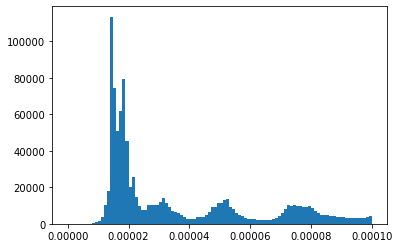

In [67]:
xqv=plt.hist(qv_in[opmask2], bins=100, density=True, range=(0,1E-4))


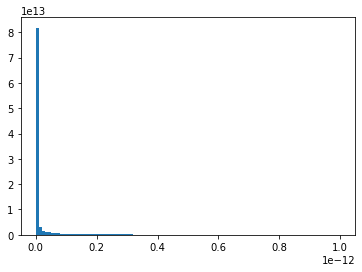

In [74]:
xqc = plt.hist(qc_in[opmask2], bins=100, density=True, range=(0,1E-12))

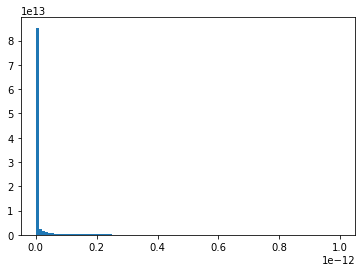

In [69]:
xqr = plt.hist(qr_in[opmask2], bins=100, density=True, range=(0,1E-12))

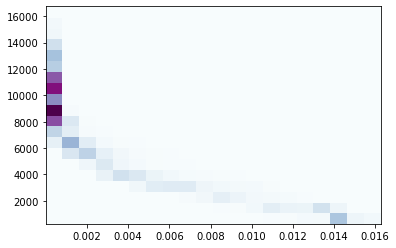

In [109]:
xx = plt.hist2d(qv_in[opmask2], z_in[opmask2], bins=(20,20), cmap=plt.cm.BuPu)

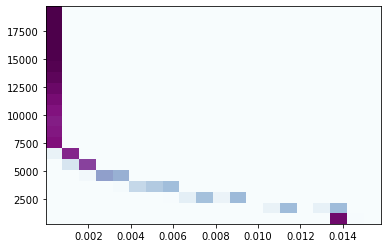

In [111]:
xx = plt.hist2d(qv_in[nopmask2], z_in[nopmask2], bins=(20,20), cmap=plt.cm.BuPu)

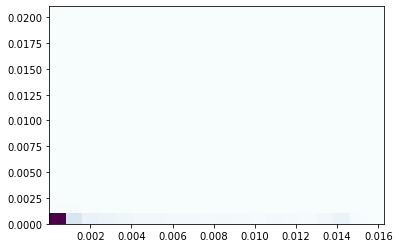

In [110]:
xx = plt.hist2d(qv_in[opmask2], qr_in[opmask2], bins=(20,20), cmap=plt.cm.BuPu)

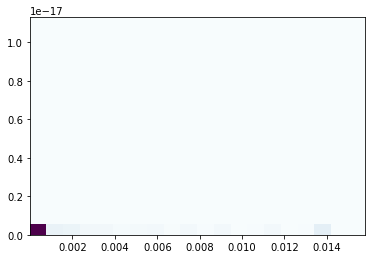

In [112]:
xx = plt.hist2d(qv_in[nopmask2], qr_in[nopmask2], bins=(20,20), cmap=plt.cm.BuPu)